In [2]:
# Importing Packages
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import chi2_contingency

In [18]:
### Loading the Data and Early Data Inspection

In [3]:
# CSV-bestanden inlezen
train_df = pd.read_csv('train_LIAR2.csv')
validation_df = pd.read_csv('valid_LIAR2.csv')
test_df = pd.read_csv('test_LIAR2.csv')

# Datasets samenvoegen
combined_df = pd.concat([train_df, validation_df, test_df], axis=0, ignore_index=True)

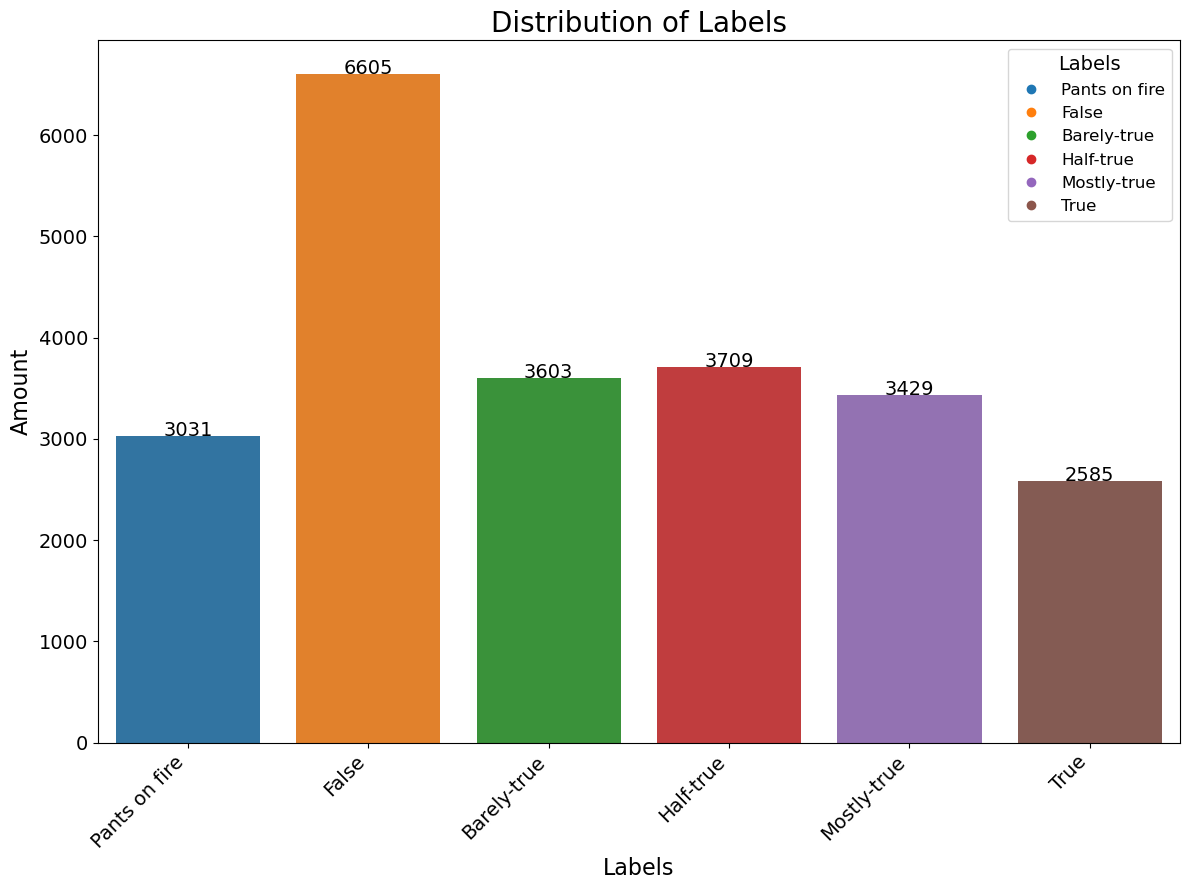

In [4]:
# Define the label mapping
label_mapping = {
    0: "Pants on fire",
    1: "False",
    2: "Barely-true",
    3: "Half-true",
    4: "Mostly-true",
    5: "True"
}

# Get label counts and map them
label_counts = combined_df['label'].value_counts().sort_index()
label_counts.index = [label_mapping[i] for i in label_counts.index]

# Define custom colors for each label
colors = sns.color_palette("tab10", len(label_counts))

# Plot
plt.figure(figsize=(12, 9))
ax = sns.barplot(x=label_counts.index, y=label_counts.values, palette=colors)
plt.title('Distribution of Labels', fontweight='medium', fontsize=20)
plt.xlabel('Labels', fontweight='medium', fontsize=16)
plt.ylabel('Amount', fontweight='medium', fontsize=16)

# Adding value annotations on top of each bar
for i, v in enumerate(label_counts.values):
    ax.text(i, v + 0.5, str(v), ha='center', fontweight='medium', fontsize=14)

# Rotate x-axis labels
plt.xticks(rotation=45, ha='right', fontsize=14)  # Increase x-axis tick label font size
plt.yticks(fontsize=14)  # Increase y-axis tick label font size

# Create a custom legend
custom_legend = [plt.Line2D([0], [0], color=colors[i], marker='o', linestyle='') for i in range(len(label_counts))]
plt.legend(custom_legend, label_counts.index, title='Labels', fontsize=12, title_fontsize=14)

plt.tight_layout()

plt.savefig('distribution_of_labels.png', dpi=600)  # Save with high dpi (300 or higher for print quality)

plt.show()


In [30]:
## Z-score

In [5]:
# Count the occurrences of each class in the 'label' column
observed_counts = combined_df['label'].value_counts().sort_index()  # Observed frequency of each class (0-5)

# Calculate the total sample size and expected counts for a balanced distribution
total_samples = observed_counts.sum()
num_classes = 6  # Classes 0 through 5
expected_counts = [total_samples / num_classes] * num_classes  # Equal distribution for each class

# Create a contingency table with observed and expected counts
contingency_table = [observed_counts, expected_counts]

# Perform the Chi-Square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square Statistic: {chi2_stat}")
print(f"P-value: {p_value}")

Chi-square Statistic: 1103.167242440728
P-value: 2.7557406417879137e-236


In [6]:
combined_df.describe()

,id,label,true_counts,mostly_true_counts,half_true_counts,mostly_false_counts,false_counts,pants_on_fire_counts
count,22962.000000,22962.000000,22962.000000,22962.000000,22962.000000,22962.000000,22962.000000,22962.000000
mean,11678.307247,2.246276,12.147505,20.443994,29.738350,46.408719,220.768705,101.395088
std,6718.710171,1.589707,22.406369,33.396781,44.076398,78.442082,436.907649,187.717729
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5872.250000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,11694.500000,2.000000,3.000000,4.000000,6.000000,6.000000,6.000000,2.000000
75%,17490.750000,4.000000,17.000000,24.000000,35.000000,53.000000,233.000000,140.000000
max,23373.000000,5.000000,124.000000,165.000000,163.000000,245.000000,1410.000000,570.000000


In [7]:
combined_df.head(5)

,id,label,statement,date,subject,speaker,speaker_description,state_info,true_counts,mostly_true_counts,half_true_counts,mostly_false_counts,false_counts,pants_on_fire_counts,context,justification
0,13847,5,"90 percent of Americans ""support universal bac...","October 2, 2017",government regulation;polls and public opinion...,chris abele,"Chris Abele is Milwaukee County Executive, a p...",wisconsin,1,4,5,3,5,2,a tweet,"""Universal"" is the term for background checks ..."
1,13411,1,Last year was one of the deadliest years ever ...,"May 19, 2017",after the fact;congress;criminal justice;histo...,thom tillis,Thom Tillis is a Republican who serves as U.S....,north carolina,0,2,7,3,2,0,a press release supporting the Back The Blue A...,"Sen. Thom Tillis, a North Carolina Republican,..."
2,10882,0,"Bernie Sanders's plan is ""to raise your taxes ...","October 28, 2015",taxes,chris christie,"Chris Christie announced June 6, 2023 that he ...",national,21,20,27,11,17,8,"Boulder, Colo","Christie said that Sanders’s plan is ""to raise..."
3,20697,4,Voter ID is supported by an overwhelming major...,"December 8, 2021",voter id laws,lee zeldin,Lee Zeldin is a Republican representing New Yo...,new york,1,2,0,0,0,0,a Tweet,Zeldin claimed voter identification requiremen...
4,6095,2,"Says Barack Obama ""robbed Medicare (of) $716 b...","August 12, 2012",federal budget;history;medicare;retirement,mitt romney,Mitt Romney is a U.S. senator from Utah. He ra...,national,31,33,58,35,32,19,"an interview on ""60 Minutes""","Romney said, ""There's only one president that ..."


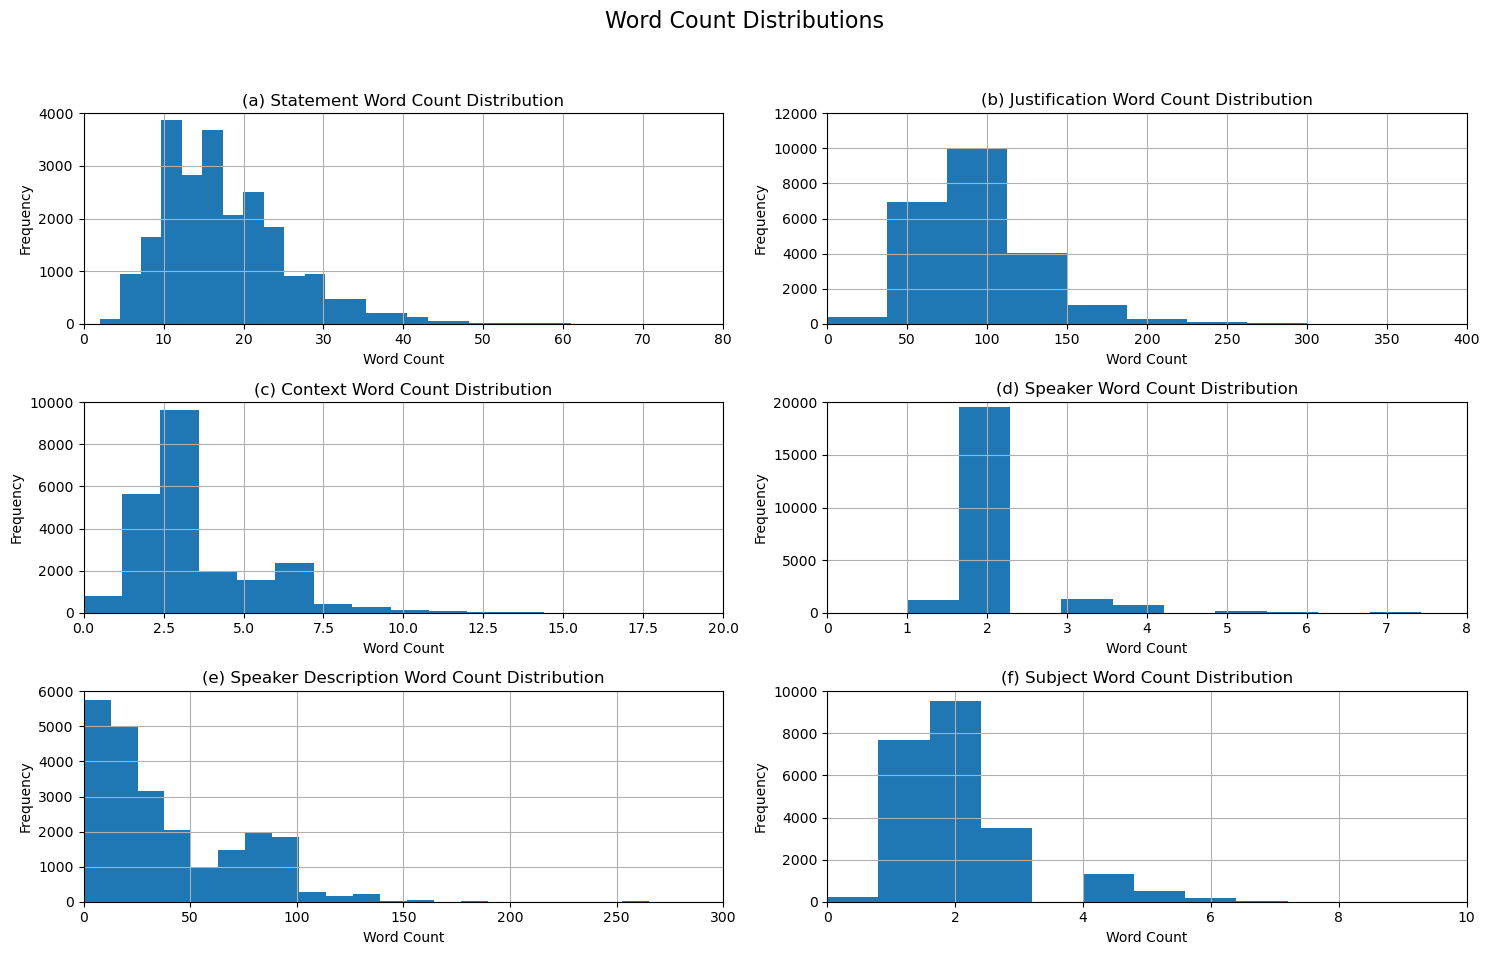

In [8]:

def word_count(text):
    return len(str(text).split()) if isinstance(text, str) else 0

# List of features
features = ['statement', 'justification', 'context', 'speaker', 'speaker_description', 'subject']

# Define custom titles and axis ranges (adjust as needed)
titles = [
    '(a) Statement Word Count Distribution',
    '(b) Justification Word Count Distribution',
    '(c) Context Word Count Distribution',
    '(d) Speaker Word Count Distribution',
    '(e) Speaker Description Word Count Distribution',
    '(f) Subject Word Count Distribution'
]

x_ranges = [
    (0, 80),    # statement
    (0, 400),   # justification
    (0, 20),    # context
    (0, 8),     # speaker
    (0, 300),   # speaker_description
    (0, 10)     # subject
]

y_ranges = [
    (0, 4000),  # statement
    (0, 12000), # justification
    (0, 10000), # context
    (0, 20000), # speaker
    (0, 6000),  # speaker_description
    (0, 10000)  # subject
]

# Define custom bin sizes based on word count ranges
bins = [30, 30, 15, 14, 30, 15]  

# Basic statistics and plotting
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
fig.suptitle('Word Count Distributions', fontsize=16)

for i, feature in enumerate(features):
    # Calculate word counts without creating a new column
    word_counts = combined_df[feature].apply(word_count)
    
    # Plotting
    ax = axes[i // 2, i % 2]
    word_counts.hist(ax=ax, bins=bins[i])  # Use specific bin count for each feature
    ax.set_title(titles[i])
    ax.set_xlabel('Word Count')
    ax.set_ylabel('Frequency')
    
    # Set axis ranges
    ax.set_xlim(x_ranges[i])
    ax.set_ylim(y_ranges[i])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit title
plt.savefig("Word Count Distribution.png", format="png", dpi=600)
plt.show()

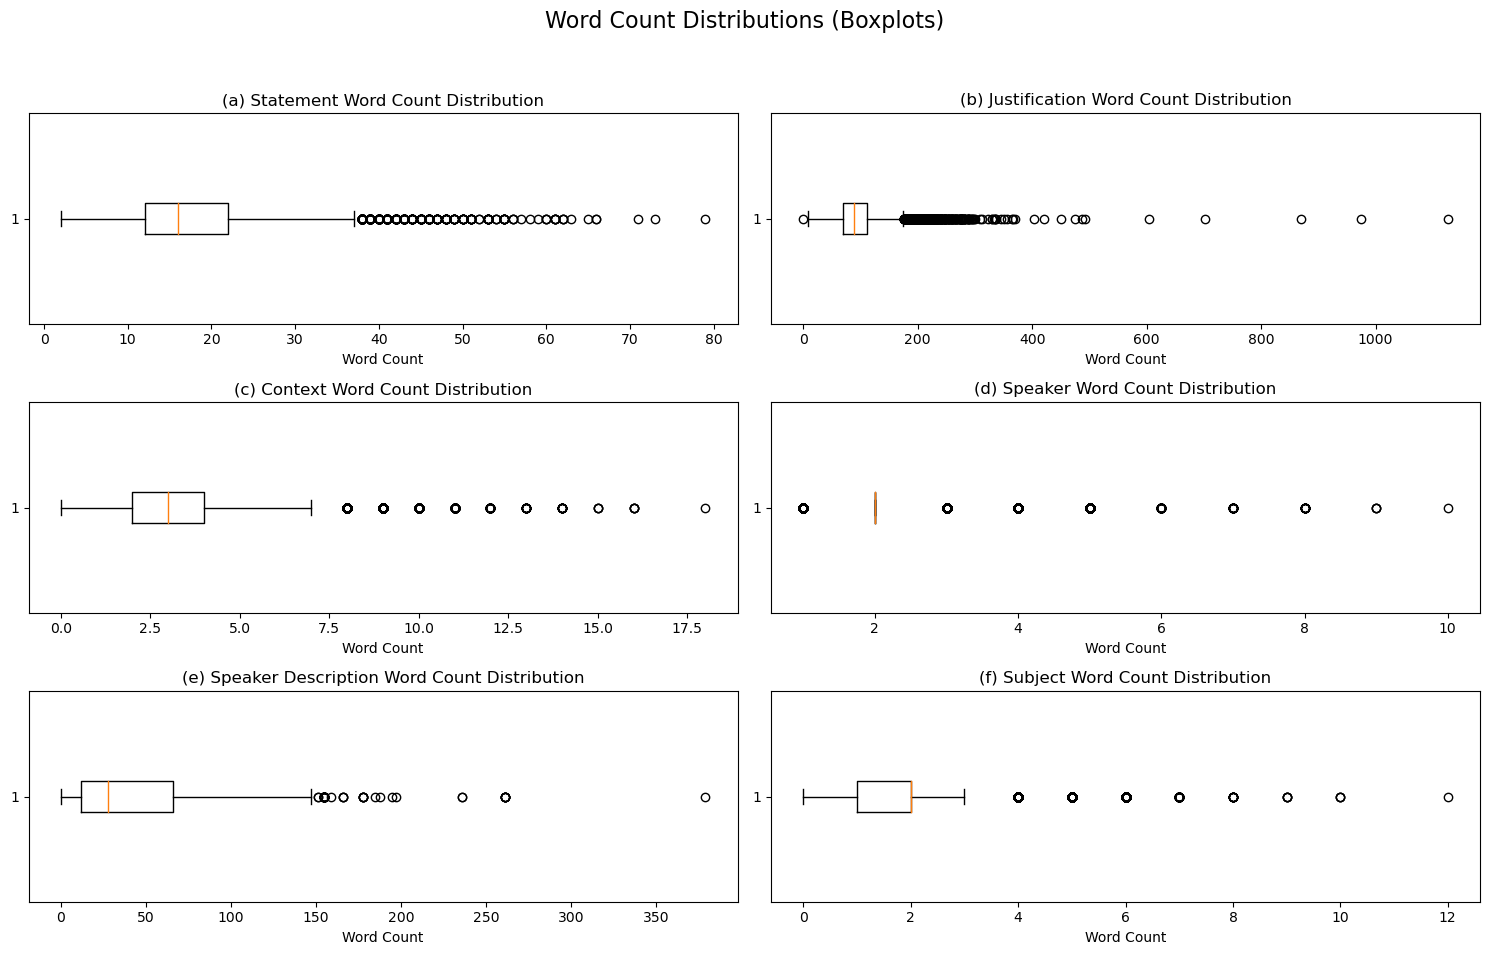

In [9]:
def word_count(text):
    return len(str(text).split()) if isinstance(text, str) else 0

# List of features
features = ['statement', 'justification', 'context', 'speaker', 'speaker_description', 'subject']

# Custom titles for the boxplots
titles = [
    '(a) Statement Word Count Distribution',
    '(b) Justification Word Count Distribution',
    '(c) Context Word Count Distribution',
    '(d) Speaker Word Count Distribution',
    '(e) Speaker Description Word Count Distribution',
    '(f) Subject Word Count Distribution'
]

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
fig.suptitle('Word Count Distributions (Boxplots)', fontsize=16)

for i, feature in enumerate(features):
    # Calculate word counts
    word_counts = combined_df[feature].apply(word_count)
    
    # Plotting
    ax = axes[i // 2, i % 2]
    ax.boxplot(word_counts, vert=False)  # Horizontal boxplot for better readability
    ax.set_title(titles[i])
    ax.set_xlabel('Word Count')
    
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit title
plt.savefig("Word Count Distribution Boxplot.png", format="png", dpi=600)
plt.show()

In [9]:
train_df.head()

,id,label,statement,date,subject,speaker,speaker_description,state_info,true_counts,mostly_true_counts,half_true_counts,mostly_false_counts,false_counts,pants_on_fire_counts,context,justification
0,13847,5,"90 percent of Americans ""support universal bac...","October 2, 2017",government regulation;polls and public opinion...,chris abele,"Chris Abele is Milwaukee County Executive, a p...",wisconsin,1,4,5,3,5,2,a tweet,"""Universal"" is the term for background checks ..."
1,13411,1,Last year was one of the deadliest years ever ...,"May 19, 2017",after the fact;congress;criminal justice;histo...,thom tillis,Thom Tillis is a Republican who serves as U.S....,north carolina,0,2,7,3,2,0,a press release supporting the Back The Blue A...,"Sen. Thom Tillis, a North Carolina Republican,..."
2,10882,0,"Bernie Sanders's plan is ""to raise your taxes ...","October 28, 2015",taxes,chris christie,"Chris Christie announced June 6, 2023 that he ...",national,21,20,27,11,17,8,"Boulder, Colo","Christie said that Sanders’s plan is ""to raise..."
3,20697,4,Voter ID is supported by an overwhelming major...,"December 8, 2021",voter id laws,lee zeldin,Lee Zeldin is a Republican representing New Yo...,new york,1,2,0,0,0,0,a Tweet,Zeldin claimed voter identification requiremen...
4,6095,2,"Says Barack Obama ""robbed Medicare (of) $716 b...","August 12, 2012",federal budget;history;medicare;retirement,mitt romney,Mitt Romney is a U.S. senator from Utah. He ra...,national,31,33,58,35,32,19,"an interview on ""60 Minutes""","Romney said, ""There's only one president that ..."


In [10]:
total_at_count = combined_df['statement'].str.count('@').sum()
total_hash_count = combined_df['statement'].str.count('#').sum()

# Print total counts
print(f"Total '@' occurrences: {total_at_count}")
print(f"Total '#' occurrences: {total_hash_count}")

Total '@' occurrences: 41
Total '#' occurrences: 93


In [ ]:
### Pre-processing

In [10]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18369 entries, 0 to 18368
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    18369 non-null  int64 
 1   label                 18369 non-null  int64 
 2   statement             18369 non-null  object
 3   date                  18369 non-null  object
 4   subject               18205 non-null  object
 5   speaker               18369 non-null  object
 6   speaker_description   18361 non-null  object
 7   state_info            13870 non-null  object
 8   true_counts           18369 non-null  int64 
 9   mostly_true_counts    18369 non-null  int64 
 10  half_true_counts      18369 non-null  int64 
 11  mostly_false_counts   18369 non-null  int64 
 12  false_counts          18369 non-null  int64 
 13  pants_on_fire_counts  18369 non-null  int64 
 14  context               18247 non-null  object
 15  justification         18369 non-null

In [13]:
train_df.isnull().sum()

id                         0
label                      0
statement                  0
date                       0
subject                  164
speaker                    0
speaker_description        8
state_info              4499
true_counts                0
mostly_true_counts         0
half_true_counts           0
mostly_false_counts        0
false_counts               0
pants_on_fire_counts       0
context                  122
justification              0
dtype: int64

In [ ]:
## duplicated rows

In [12]:
train_df.duplicated().sum()

0

In [ ]:
## Replacing missing values to Unknown

In [13]:
train_df.replace('', np.nan, inplace=True)

In [15]:
train_df['subject']= train_df['subject'].replace(np.nan, 'Unknown')
train_df["state_info"]= train_df["state_info"].replace(np.nan, 'Unknown')
train_df["context"]= train_df["context"].replace(np.nan, 'Unknown')
train_df["speaker_description"]= train_df["speaker_description"].replace(np.nan, 'Unknown')
validation_df['subject']= train_df['subject'].replace(np.nan, 'Unknown')
validation_df["state_info"]= train_df["state_info"].replace(np.nan, 'Unknown')
validation_df["context"]= train_df["context"].replace(np.nan, 'Unknown')
validation_df["speaker_description"]= train_df["speaker_description"].replace(np.nan, 'Unknown')
test_df['subject']= train_df['subject'].replace(np.nan, 'Unknown')
test_df["state_info"]= train_df["state_info"].replace(np.nan, 'Unknown')
test_df["context"]= train_df["context"].replace(np.nan, 'Unknown')
test_df["speaker_description"]= train_df["speaker_description"].replace(np.nan, 'Unknown')

In [15]:
train_df.isnull().sum()

id                      0
label                   0
statement               0
date                    0
subject                 0
speaker                 0
speaker_description     0
state_info              0
true_counts             0
mostly_true_counts      0
half_true_counts        0
mostly_false_counts     0
false_counts            0
pants_on_fire_counts    0
context                 0
justification           0
dtype: int64

In [16]:
train_df.head()

,id,label,statement,date,subject,speaker,speaker_description,state_info,true_counts,mostly_true_counts,half_true_counts,mostly_false_counts,false_counts,pants_on_fire_counts,context,justification
0,13847,5,"90 percent of Americans ""support universal bac...","October 2, 2017",government regulation;polls and public opinion...,chris abele,"Chris Abele is Milwaukee County Executive, a p...",wisconsin,1,4,5,3,5,2,a tweet,"""Universal"" is the term for background checks ..."
1,13411,1,Last year was one of the deadliest years ever ...,"May 19, 2017",after the fact;congress;criminal justice;histo...,thom tillis,Thom Tillis is a Republican who serves as U.S....,north carolina,0,2,7,3,2,0,a press release supporting the Back The Blue A...,"Sen. Thom Tillis, a North Carolina Republican,..."
2,10882,0,"Bernie Sanders's plan is ""to raise your taxes ...","October 28, 2015",taxes,chris christie,"Chris Christie announced June 6, 2023 that he ...",national,21,20,27,11,17,8,"Boulder, Colo","Christie said that Sanders’s plan is ""to raise..."
3,20697,4,Voter ID is supported by an overwhelming major...,"December 8, 2021",voter id laws,lee zeldin,Lee Zeldin is a Republican representing New Yo...,new york,1,2,0,0,0,0,a Tweet,Zeldin claimed voter identification requiremen...
4,6095,2,"Says Barack Obama ""robbed Medicare (of) $716 b...","August 12, 2012",federal budget;history;medicare;retirement,mitt romney,Mitt Romney is a U.S. senator from Utah. He ra...,national,31,33,58,35,32,19,"an interview on ""60 Minutes""","Romney said, ""There's only one president that ..."


In [67]:
## Data cleaning

In [17]:
def preprocess_text(text):
    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Remove user @ references and '#' from text
    text = re.sub(r'\@\w+|\#','', text)
    return text  # Return the modified text

# Apply preprocessing
for dataset in [train_df, test_df, validation_df]:
    dataset['statement'] = dataset['statement'].apply(preprocess_text)

In [18]:
train_df.head()

,id,label,statement,date,subject,speaker,speaker_description,state_info,true_counts,mostly_true_counts,half_true_counts,mostly_false_counts,false_counts,pants_on_fire_counts,context,justification
0,13847,5,"90 percent of Americans ""support universal bac...","October 2, 2017",government regulation;polls and public opinion...,chris abele,"Chris Abele is Milwaukee County Executive, a p...",wisconsin,1,4,5,3,5,2,a tweet,"""Universal"" is the term for background checks ..."
1,13411,1,Last year was one of the deadliest years ever ...,"May 19, 2017",after the fact;congress;criminal justice;histo...,thom tillis,Thom Tillis is a Republican who serves as U.S....,north carolina,0,2,7,3,2,0,a press release supporting the Back The Blue A...,"Sen. Thom Tillis, a North Carolina Republican,..."
2,10882,0,"Bernie Sanders's plan is ""to raise your taxes ...","October 28, 2015",taxes,chris christie,"Chris Christie announced June 6, 2023 that he ...",national,21,20,27,11,17,8,"Boulder, Colo","Christie said that Sanders’s plan is ""to raise..."
3,20697,4,Voter ID is supported by an overwhelming major...,"December 8, 2021",voter id laws,lee zeldin,Lee Zeldin is a Republican representing New Yo...,new york,1,2,0,0,0,0,a Tweet,Zeldin claimed voter identification requiremen...
4,6095,2,"Says Barack Obama ""robbed Medicare (of) $716 b...","August 12, 2012",federal budget;history;medicare;retirement,mitt romney,Mitt Romney is a U.S. senator from Utah. He ra...,national,31,33,58,35,32,19,"an interview on ""60 Minutes""","Romney said, ""There's only one president that ..."


In [19]:
train_df.to_csv('train_dataV3.csv', index=False)
validation_df.to_csv('valid_LIAR2.csv', index=False)
test_df.to_csv('test_LIAR2.csv', index=False)

In [20]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18369 entries, 0 to 18368
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   id                    18369 non-null  int64 
 1   label                 18369 non-null  int64 
 2   statement             18369 non-null  object
 3   date                  18369 non-null  object
 4   subject               18369 non-null  object
 5   speaker               18369 non-null  object
 6   speaker_description   18369 non-null  object
 7   state_info            18369 non-null  object
 8   true_counts           18369 non-null  int64 
 9   mostly_true_counts    18369 non-null  int64 
 10  half_true_counts      18369 non-null  int64 
 11  mostly_false_counts   18369 non-null  int64 
 12  false_counts          18369 non-null  int64 
 13  pants_on_fire_counts  18369 non-null  int64 
 14  context               18369 non-null  object
 15  justification         18369 non-null

In [55]:
train_100_df = train_df.head()
train_100_df.to_csv("train_100_df.csv", index =False)

In [19]:
total_at_count2 = train_df['statement'].str.count('@').sum()
total_hash_count2 = train_df['statement'].str.count('#').sum()

# Print total counts
print(f"Total '@' occurrences: {total_at_count2}")
print(f"Total '#' occurrences: {total_hash_count2}")

Total '@' occurrences: 0
Total '#' occurrences: 0
